In [1]:
import numpy as np 
import pandas as pd 
import csv 
import matplotlib.pyplot as plt


/Users/amlannag/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:

# Assuming the CSV file is in the current working directory
try:
  # Try to read the CSV file
  df = pd.read_csv("historical_data.csv")
  
  # Print the first 10 rows
  print(df.head(10))
except FileNotFoundError:
  # Handle file not found error
  print("Error: File 'prices_round_1_day_-1.csv' not found in the current directory.")


  day;timestamp;product;bid_price_1;bid_volume_1;bid_price_2;bid_volume_2;bid_price_3;bid_volume_3;ask_price_1;ask_volume_1;ask_price_2;ask_volume_2;ask_price_3;ask_volume_3;mid_price;profit_and_loss
0  -1;0;AMETHYSTS;10002;1;9996.0;2.0;9995.0;29.0;...                                                                                                                                                   
1  -1;0;STARFRUIT;5045;1;5040.0;31.0;;;5047;31;;;...                                                                                                                                                   
2  -1;100;STARFRUIT;5040;24;;;;;5046;2;5047.0;22....                                                                                                                                                   
3  -1;100;AMETHYSTS;9996;2;9995.0;22.0;;;10004;2;...                                                                                                                                                   


In [3]:
df = df = pd.read_csv("historical_data.csv", sep=";")
  
# Filter for rows containing 'amethyst' (assuming 'product' column contains the product name)
amethyst_df = df[df['product'].str.contains("amethyst", case=False)]
sorted_df = amethyst_df.sort_values(by =['day','timestamp'], ascending=False)
sorted_df = sorted_df.fillna(0)
# Print the amethyst data
sorted_df['vwap']=(sorted_df['bid_price_1']*sorted_df['bid_volume_1'] + sorted_df['ask_price_1']*sorted_df['ask_volume_1'] )/(sorted_df['ask_volume_1']+sorted_df['bid_volume_1'])
sorted_df['vwap_3']=(sorted_df['bid_price_1']*sorted_df['bid_volume_1']+sorted_df['bid_price_2']*sorted_df['bid_volume_2'] + sorted_df['bid_price_3']*sorted_df['bid_volume_3']\
                     +sorted_df['ask_price_1']*sorted_df['ask_volume_1']+sorted_df['ask_price_2']*sorted_df['ask_volume_2']+sorted_df['ask_price_3']*sorted_df['ask_volume_3'] )\
                        /(sorted_df['ask_volume_1']+sorted_df['bid_volume_1']+sorted_df['ask_volume_2']+sorted_df['bid_volume_2']+sorted_df['ask_volume_3']+sorted_df['bid_volume_3'])

print(sorted_df.head(5))




       day  timestamp    product  bid_price_1  bid_volume_1  bid_price_2  \
59999    0    2999900  AMETHYSTS         9996             2       9995.0   
59997    0    2999800  AMETHYSTS         9995            27          0.0   
59994    0    2999700  AMETHYSTS         9996             2       9995.0   
59993    0    2999600  AMETHYSTS         9996             2       9995.0   
59991    0    2999500  AMETHYSTS         9995            28          0.0   

       bid_volume_2  bid_price_3  bid_volume_3  ask_price_1  ask_volume_1  \
59999          21.0          0.0           0.0        10004             2   
59997           0.0          0.0           0.0        10005            27   
59994          24.0          0.0           0.0        10004             2   
59993          27.0          0.0           0.0        10002             3   
59991           0.0          0.0           0.0        10002             6   

       ask_price_2  ask_volume_2  ask_price_3  ask_volume_3  mid_price  \
59999 

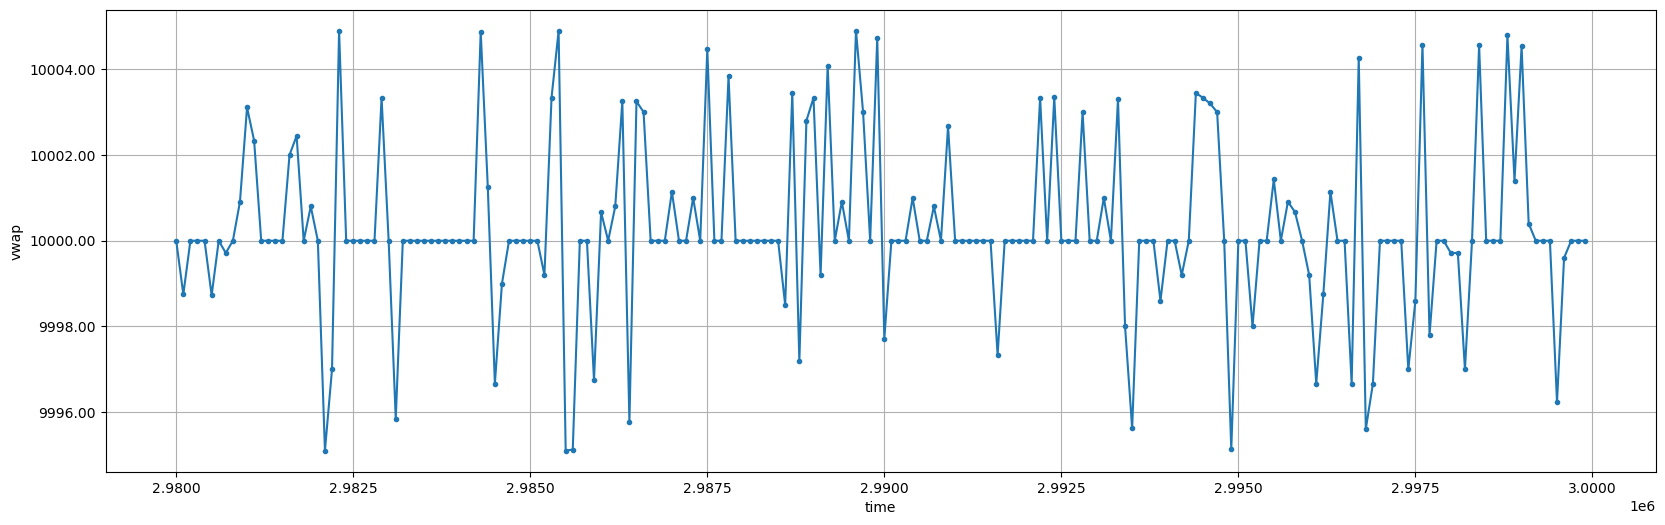

In [5]:
# Extract data for plotting
df_1 = sorted_df.iloc[:200]
timestamps = df_1['timestamp']
vwap = df_1['vwap']

# Configure and display the plot
plt.figure(figsize=(20, 6))  # Adjust the figure size as needed
plt.plot(timestamps, vwap, marker='.', linestyle='-')
plt.xlabel('time')
plt.ylabel('vwap')
plt.grid(True)

plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))

plt.show()

In [5]:
"""
def mean_cal(df,col:str ,k: int):
    mean_list = []
    k_sum = 0 
    for i, value in enumerate(df[col]): 
        if i+1 < k:
            k_sum = sum(int(value),k_sum)
            mean_list.append(k_sum/(i+1))
        if i+1 >= k:
            k_sum = k_sum + value - df.loc[i-k, col]
            mean_list.append(k_sum/k)
    mean_df = pd.DataFrame({'mean':mean_list})

    return mean_df 
"""
def mean_cal(df: pd.DataFrame, col: str, k: int) -> pd.DataFrame:
    
    if k <= 0:
        raise ValueError("Window size (k) must be greater than 0.")

    # Create an empty list to store the rolling means
    rolling_means = []
    std_val = []

    # Iterate over the data, calculating the mean for the current window size
    for i, value in enumerate(df[col]):
        # If the window hasn't reached its full size yet, use the available data
        if i + 1 <= k:
            rolling_mean = sum(df[col][:i + 1]) / (i + 1)  # Average of all elements seen so far
        # Otherwise, use the previous mean and update it incrementally
            std_val.append(df[col][:i].std())
        else:
            previous_mean = rolling_means[i-1]
            rolling_mean = previous_mean + (value - df.loc[i - k, col]) / k
            std_val.append(df[col][i-k-1:i-1 ].std())

        rolling_means.append(rolling_mean)

    # Create a DataFrame with the rolling mean as a new column
    mean_df = pd.DataFrame({'mean':rolling_means})
    std_df = pd.DataFrame({'std':std_val})
    return mean_df, std_df

sorted_df = sorted_df.reset_index(drop=True)  

def mean_cal(df: pd.DataFrame, col: str, k: int) -> pd.DataFrame:
    
    if k <= 0:
        raise ValueError("Window size (k) must be greater than 0.")

    # Create an empty list to store the rolling means
    rolling_means = []
    std_val = []

    # Iterate over the data, calculating the mean for the current window size
    for i, value in enumerate(df[col]):
        # If the window hasn't reached its full size yet, use the available data
        if i + 1 <= k:
            rolling_mean = sum(df[col][:i + 1]) / (i + 1)  # Average of all elements seen so far
        # Otherwise, use the previous mean and update it incrementally
            std_val.append(df[col][:i].std())
        else:
            previous_mean = rolling_means[i-1]
            rolling_mean = previous_mean + (value - df.loc[i - k, col]) / k
            std_val.append(df[col][i-k-1:i-1 ].std())

        rolling_means.append(rolling_mean)

    # Create a DataFrame with the rolling mean as a new column
    mean_df = pd.DataFrame({'mean':rolling_means})
    std_df = pd.DataFrame({'std':std_val})
    return mean_df, std_df

mean_cal(sorted_df,'vwap',5)





(               mean
 0      10000.000000
 1      10000.000000
 2      10000.000000
 3       9999.900000
 4       9999.167059
 ...             ...
 29995   9998.878261
 29996   9998.878261
 29997   9999.078261
 29998   9999.878261
 29999   9999.878261
 
 [30000 rows x 1 columns],
             std
 0           NaN
 1           NaN
 2      0.000000
 3      0.000000
 4      0.200000
 ...         ...
 29995  1.659987
 29996  0.447214
 29997  1.996784
 29998  1.996784
 29999  2.061071
 
 [30000 rows x 1 columns])

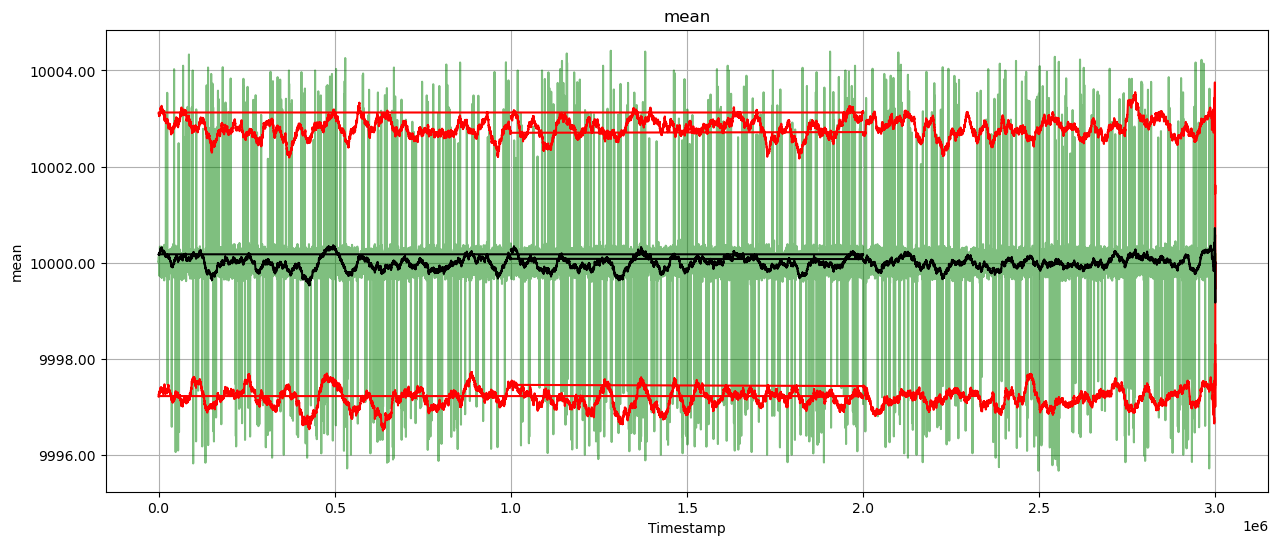

"\nplt.figure(figsize=(15, 6))\nplt.plot(timestamps, std, linestyle='-')  # Reduce marker opacity\nplt.xlabel('Timestamp')\nplt.ylabel('std')\nplt.title('std')\nplt.grid(True)\n  \nplt.show()\n"

In [6]:
# Extract data for plotting
mean_df, std_df = mean_cal(sorted_df, 'vwap', 300)
timestamps = sorted_df['timestamp']
mean = mean_df['mean']
std = std_df['std']

k = 1.4


mean_df['mean_max'] = mean_df['mean']+(std_df['std']*k)
mean_df['mean_min'] = mean_df['mean']-(std_df['std']*k)




plt.figure(figsize=(15, 6))  # Adjust the figure size as needed
plt.plot(timestamps, sorted_df['vwap_3'], linestyle='-', color = 'green', alpha=0.5)
plt.plot(timestamps, mean_df['mean_min'], linestyle='-',alpha= 1, color ='r')  # Reduce marker opacity
plt.plot(timestamps, mean_df['mean_max'], linestyle='-',alpha= 1, color = 'r')
plt.plot(timestamps, mean, linestyle='-',color= 'black') 

plt.xlabel('Timestamp')
plt.ylabel('mean')
plt.title('mean')
plt.grid(True)

plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))
plt.show()

"""
plt.figure(figsize=(15, 6))
plt.plot(timestamps, std, linestyle='-')  # Reduce marker opacity
plt.xlabel('Timestamp')
plt.ylabel('std')
plt.title('std')
plt.grid(True)
  
plt.show()
"""

TypeError: can't multiply sequence by non-int of type 'list'